# <b> Machine Learning Model to Predict the Overall Beer Ratings
    

## <b>Setup 

In [1]:
import seaborn as sea
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize
import wordcloud
from wordcloud import WordCloud
from nltk import word_tokenize

## <b> Loading Data from Kaggle API

In [2]:
data = pd.read_csv('beer_reviews.csv')
data.shape

(1586614, 13)

In [3]:
data = data.sample(200000)

In [4]:
data.shape

(200000, 13)

## <b> Informatiom About the Data

In [5]:
# First lines
data.head(2)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1190546,10099,Dogfish Head Brewery,1269562597,4.0,4.0,4.5,JoePat,American IPA,4.0,4.5,ApriHop,7.0,3951
1536299,212,Brouwerij Van Honsebrouck N.V.,1099764162,3.0,3.0,4.0,paterlodie,Belgian Pale Ale,4.0,3.0,Kasteel Blond,7.0,1712


In [6]:
# Rows and Cols
data.shape

(200000, 13)

In [7]:
# Data informations
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1190546 to 643873
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          200000 non-null  int64  
 1   brewery_name        199999 non-null  object 
 2   review_time         200000 non-null  int64  
 3   review_overall      200000 non-null  float64
 4   review_aroma        200000 non-null  float64
 5   review_appearance   200000 non-null  float64
 6   review_profilename  199959 non-null  object 
 7   beer_style          200000 non-null  object 
 8   review_palate       200000 non-null  float64
 9   review_taste        200000 non-null  float64
 10  beer_name           200000 non-null  object 
 11  beer_abv            191364 non-null  float64
 12  beer_beerid         200000 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 21.4+ MB


In [8]:
# Statistics
data.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,191364.000000,200000.000000
mean,3127.876205,1.224159e+09,3.814635,3.735513,3.840395,3.743002,3.791478,7.039362,21666.390760
std,5572.603692,7.646196e+07,0.719877,0.697388,0.617163,0.682408,0.731555,2.315148,21795.243352
min,1.000000,8.867232e+08,0.000000,1.000000,0.000000,1.000000,1.000000,0.050000,4.000000
25%,143.000000,1.173645e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.200000,1717.000000
50%,429.000000,1.239282e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,13845.000000
75%,2372.000000,1.288492e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,39399.250000
max,27980.000000,1.326271e+09,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77314.000000


In [9]:
# Data Types
data.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [10]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1190546,10099,Dogfish Head Brewery,1269562597,4.0,4.0,4.5,JoePat,American IPA,4.0,4.5,ApriHop,7.0,3951
1536299,212,Brouwerij Van Honsebrouck N.V.,1099764162,3.0,3.0,4.0,paterlodie,Belgian Pale Ale,4.0,3.0,Kasteel Blond,7.0,1712
1212042,898,Heavy Seas Beer,1200804918,4.0,3.5,3.5,cichief,Russian Imperial Stout,4.0,4.0,Heavy Seas - Peg Leg (Imperial Stout),8.0,19667
1233861,478,Labatt Brewing Company Ltd.,1157344998,4.0,3.0,3.5,fainster,American Adjunct Lager,3.0,4.0,Kokanee,5.0,2472
879971,147,Stone Brewing Co.,1215741609,5.0,4.5,4.5,iconoklaztor,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.5,1160


## <b> Exploratory Data Analysis

### <b> Searching for Missing Values

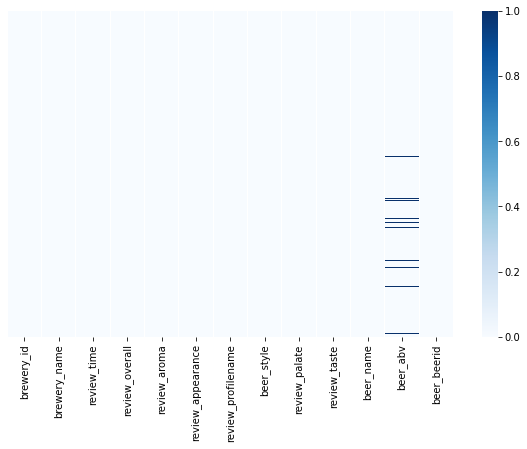

In [11]:
# Looking through a heat map
plt.figure(figsize = (10,6))
ax = sea.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='Blues')

<b> The thin different blue lines represents missing values

### <b> Dealing with missing values

In [12]:
# Sum of total missing values per column
data.isnull().sum()

brewery_id               0
brewery_name             1
review_time              0
review_overall           0
review_aroma             0
review_appearance        0
review_profilename      41
beer_style               0
review_palate            0
review_taste             0
beer_name                0
beer_abv              8636
beer_beerid              0
dtype: int64

In [13]:
data.dropna(inplace=True)

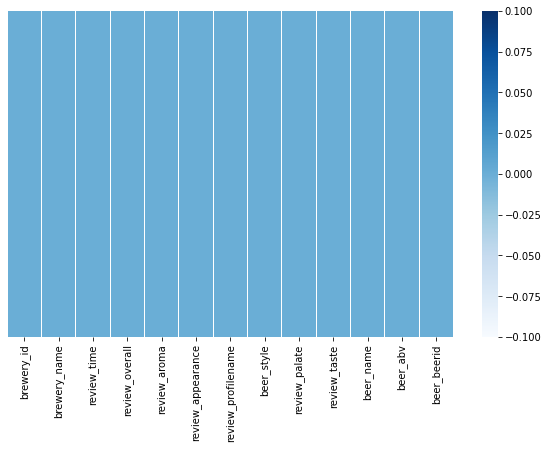

In [14]:
# Looking through a heat map
plt.figure(figsize = (10,6))
ax = sea.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='Blues')

<b> Solid color indicates no missing values

### <b> Data Correlation

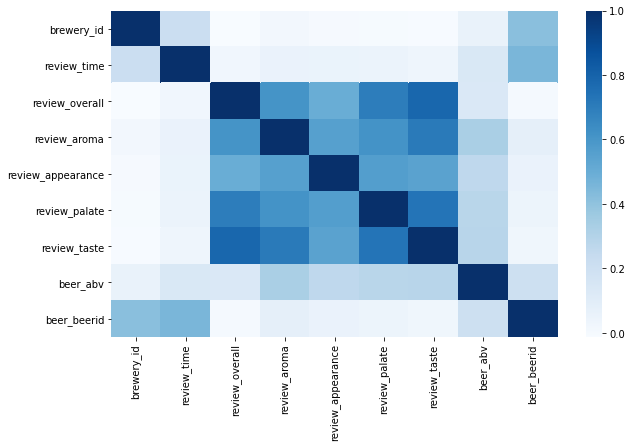

In [24]:
corr_data = data.corr() #test with correlated data

# Looking through a heat map
plt.figure(figsize = (10,6))
ax = sea.heatmap(corr_data, yticklabels=True, cbar=True, cmap='Blues')

In [22]:
strongly_correlated_columns = ['review_taste', 'review_palate', 'review_aroma', 'review_appearance']

df = data.drop(columns=strongly_correlated_columns)

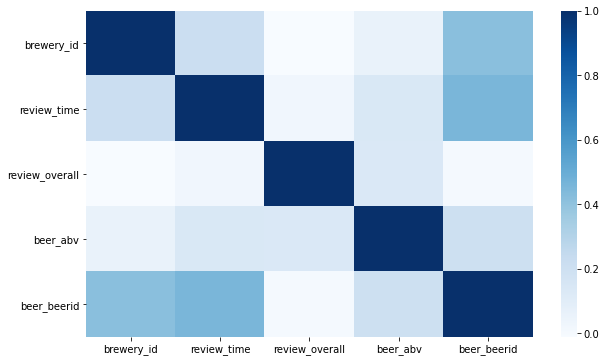

In [23]:
corr_data = df.corr() #test with correlated data

# Looking through a heat map
plt.figure(figsize = (10,6))
ax = sea.heatmap(corr_data, yticklabels=True, cbar=True, cmap='Blues')

# <b> Text Processing

In [25]:
data.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1190546,10099,Dogfish Head Brewery,1269562597,4.0,4.0,4.5,JoePat,American IPA,4.0,4.5,ApriHop,7.0,3951
1536299,212,Brouwerij Van Honsebrouck N.V.,1099764162,3.0,3.0,4.0,paterlodie,Belgian Pale Ale,4.0,3.0,Kasteel Blond,7.0,1712
1212042,898,Heavy Seas Beer,1200804918,4.0,3.5,3.5,cichief,Russian Imperial Stout,4.0,4.0,Heavy Seas - Peg Leg (Imperial Stout),8.0,19667
1233861,478,Labatt Brewing Company Ltd.,1157344998,4.0,3.0,3.5,fainster,American Adjunct Lager,3.0,4.0,Kokanee,5.0,2472
879971,147,Stone Brewing Co.,1215741609,5.0,4.5,4.5,iconoklaztor,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.5,1160


In [26]:
def clean_text(text):    
    words = word_tokenize(text)
    words = [w.lower() for w in words if w.isalpha()]    
    return ' '.join(words)

data['brewery_name_c'] = [clean_text(line) for line in data['brewery_name']]
data['beer_style_c'] = [clean_text(line) for line in data['beer_style']]
data['beer_name_c'] = [clean_text(line) for line in data['beer_name']]

In [27]:
data[['brewery_name','beer_name','beer_style']].head()

,brewery_name,beer_name,beer_style
1190546,Dogfish Head Brewery,ApriHop,American IPA
1536299,Brouwerij Van Honsebrouck N.V.,Kasteel Blond,Belgian Pale Ale
1212042,Heavy Seas Beer,Heavy Seas - Peg Leg (Imperial Stout),Russian Imperial Stout
1233861,Labatt Brewing Company Ltd.,Kokanee,American Adjunct Lager
879971,Stone Brewing Co.,Stone Imperial Russian Stout,Russian Imperial Stout


In [28]:
data[['brewery_name_c','beer_name_c','beer_style_c']].head()

,brewery_name_c,beer_name_c,beer_style_c
1190546,dogfish head brewery,aprihop,american ipa
1536299,brouwerij van honsebrouck,kasteel blond,belgian pale ale
1212042,heavy seas beer,heavy seas peg leg imperial stout,russian imperial stout
1233861,labatt brewing company ltd,kokanee,american adjunct lager
879971,stone brewing co,stone imperial russian stout,russian imperial stout


# <b> Visualizing Data

In [36]:
top_n = 30

In [29]:
import nltk
''''
    Creates a word cloud based on words frequency of the text
    Input: text
    Return: wordcloud
'''
def word_cloud(text):
    word_join = ' '.join(text.tolist())
    frequency = nltk.FreqDist(word_tokenize(word_join))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(frequency)
    return wordcloud

In [30]:
text_columns = data[['brewery_name_c','brewery_name', 'beer_name_c', 'beer_name','beer_style_c', 'beer_style']]
text_columns.head()

,brewery_name_c,brewery_name,beer_name_c,beer_name,beer_style_c,beer_style
1190546,dogfish head brewery,Dogfish Head Brewery,aprihop,ApriHop,american ipa,American IPA
1536299,brouwerij van honsebrouck,Brouwerij Van Honsebrouck N.V.,kasteel blond,Kasteel Blond,belgian pale ale,Belgian Pale Ale
1212042,heavy seas beer,Heavy Seas Beer,heavy seas peg leg imperial stout,Heavy Seas - Peg Leg (Imperial Stout),russian imperial stout,Russian Imperial Stout
1233861,labatt brewing company ltd,Labatt Brewing Company Ltd.,kokanee,Kokanee,american adjunct lager,American Adjunct Lager
879971,stone brewing co,Stone Brewing Co.,stone imperial russian stout,Stone Imperial Russian Stout,russian imperial stout,Russian Imperial Stout


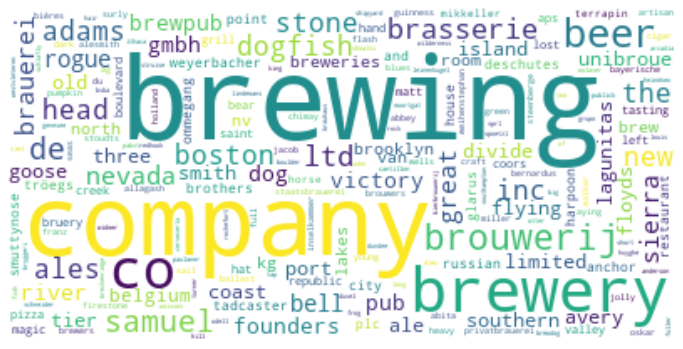

In [31]:
cloud_name  = word_cloud(text_columns['brewery_name_c'])
plt.figure(figsize = (12,12))
plt.imshow(cloud_name, interpolation='bilinear')
plt.axis("off")
plt.show()

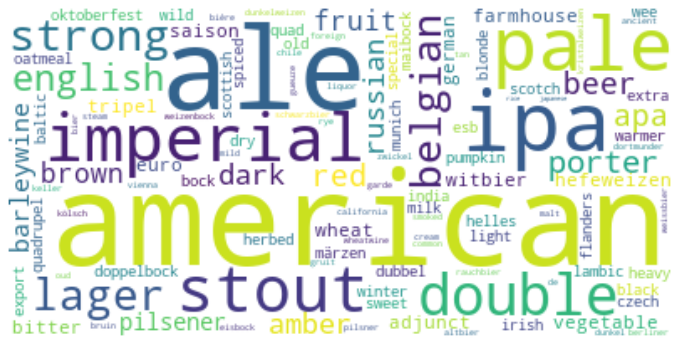

In [32]:
cloud_style  = word_cloud(text_columns['beer_style_c'])
plt.figure(figsize = (12,12))
plt.imshow(cloud_style, interpolation='bilinear')
plt.axis("off")
plt.show()

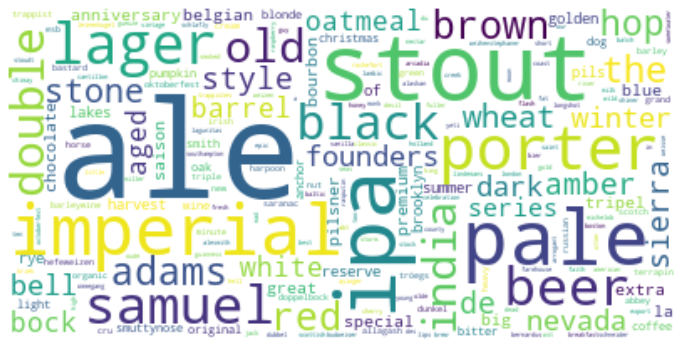

In [33]:
cloud_name  = word_cloud(text_columns['beer_name_c'])
plt.figure(figsize = (12,12))
plt.imshow(cloud_name, interpolation='bilinear')
plt.axis("off")
plt.show()

### <b> Styles

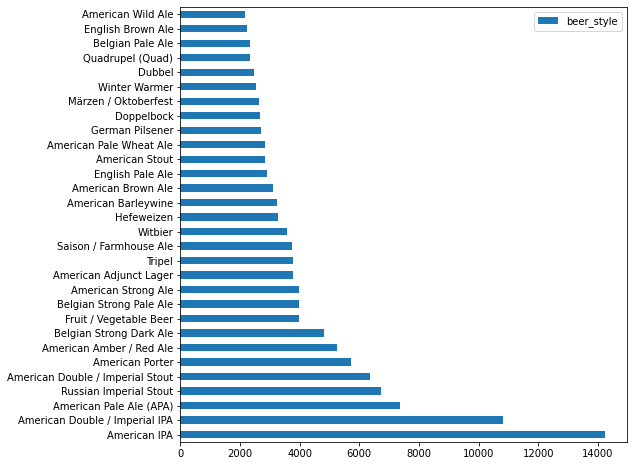

In [42]:
ax = text_columns['beer_style'].value_counts().head(top_n).to_frame().plot(kind='barh', figsize=(8,8))

In [43]:
print("Number of Unique Styles = ", len(text_columns['beer_style'].unique()))

Number of Unique Styles =  104


### <b> Brewers
    

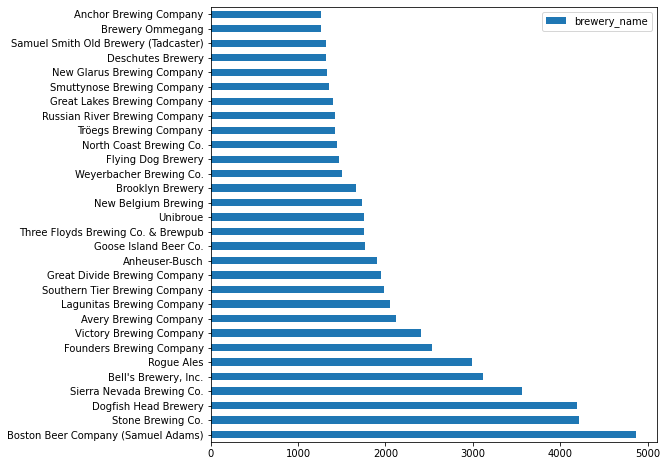

In [50]:
ax = text_columns['brewery_name'].value_counts().head(top_n).to_frame().plot(kind='barh', figsize=(8,8))

In [51]:
print("Number of Unique Brewers = ", len(text_columns['brewery_name'].unique()))

Number of Unique Brewers =  3512


### <b> Beers
    

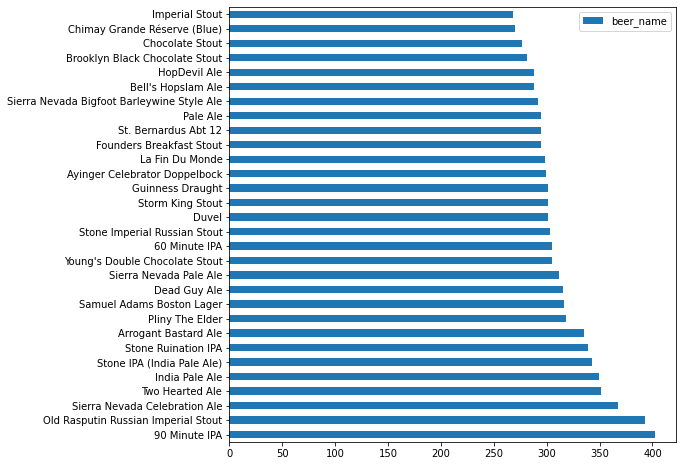

In [53]:
ax = text_columns['beer_name'].value_counts().head(top_n).to_frame().plot(kind='barh', figsize=(8,8))

In [54]:
print("Number of Unique Brewers = ", len(text_columns['beer_name'].unique()))

Number of Unique Brewers =  20467


### <b> Number of Rated Beers by Style

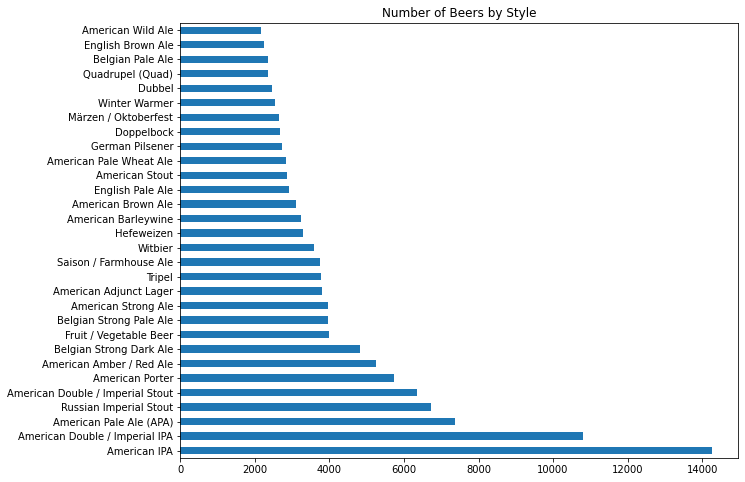

In [55]:
# DataFrame with Information
style_df = text_columns['beer_style'].value_counts().head(top_n)
plt.figure(figsize = (10,8))
ax = style_df.plot(kind='barh')
ax = plt.title('Number of Beers by Style')

### <b> Mean Rating of Beers by Style

In [57]:
df_rating_style = pd.DataFrame(columns =['Ratings', 'Style'])
df_rating_style['Ratings'] = data['review_overall']
df_rating_style['Style'] = text_columns['beer_style']

In [58]:
df_rating_style.head()

,Ratings,Style
1190546,4.0,American IPA
1536299,3.0,Belgian Pale Ale
1212042,4.0,Russian Imperial Stout
1233861,4.0,American Adjunct Lager
879971,5.0,Russian Imperial Stout


In [59]:
rating_style = df_rating_style.groupby(['Style'])['Ratings'].mean()

In [60]:
df_rating_style = pd.DataFrame(rating_style)
df_rating_style.head()

,Ratings
Style,
Altbier,3.830076
American Adjunct Lager,3.019763
American Amber / Red Ale,3.791270
American Amber / Red Lager,3.562860
American Barleywine,3.889146


### <b> Mean Rating of Beers by ABV

In [61]:
df_abv_style = pd.DataFrame(columns =['Ratings', 'ABV'])
df_abv_style['Ratings'] = data['review_overall']
df_abv_style['ABV'] = data['beer_abv']

In [62]:
df_abv_style.head()

,Ratings,ABV
1190546,4.0,7.0
1536299,3.0,7.0
1212042,4.0,8.0
1233861,4.0,5.0
879971,5.0,10.5


In [64]:
abv_style = df_abv_style.groupby(['ABV'])['Ratings'].mean()

In [65]:
df_abv_style = pd.DataFrame(abv_style)
df_abv_style.head()

,Ratings
ABV,
0.05,2.333333
0.10,2.333333
0.30,2.350000
0.40,2.461538
0.45,3.666667


### <b> Which Brewer Produces the Strongest ABV?

In [66]:
# Identifies the higher value for the abv in the dataset unique in the first position
strong_abv = data['beer_abv'].max()
print('Stronger ABV =', strong_abv)

Stronger ABV = 57.7


In [67]:
# Identifies the higher value for the abv in the dataset unique in the first position
strong_abv = data['beer_abv'].max()
print('Beer with strongest ABV =', data[data['beer_abv'] == strong_abv]['beer_name'].unique()[0])

Beer with strongest ABV = Schorschbräu Schorschbock 57%


In [68]:
# Select the brewer id which produces the strons abv 
brewer_strong_abv = data[data['beer_abv'] == strong_abv]['brewery_id'].max()

print('Brewery with stronger ABV =', data[data['brewery_id'] == brewer_strong_abv]['brewery_name'].unique()[0])

Brewery with stronger ABV = Schorschbräu


### <b> How many beers by brewer?

In [71]:
beer_count = data.groupby(['brewery_name'])['beer_name'].count()
df_beer_count = pd.DataFrame(beer_count)
df_beer_count.head(top_n)

,beer_name
brewery_name,
't Hofbrouwerijke,4
(512) Brewing Company,35
10 Barrel Brewing Co.,10
1516 Brewing Company,2
16 Mile Brewing Company,10
2 Brothers Brewery,10
21st Amendment Brewery,405
23rd Street Brewery,1
2nd Shift Brewery,3


### <b> What type of beer has the highest score?

In [72]:
beer_high = data.groupby(['beer_name'])['review_overall'].count()
df_beer_high = pd.DataFrame(beer_high)
df_beer_high[df_beer_high['review_overall'] == 5].head(top_n)

,review_overall
beer_name,
10 Degrees Below,5
110K+OT Batch #4 - Imperial Red Ale,5
11th Anniversary Double Wheat,5
132 Cents IPA,5
2006 Christmas Ale,5
2010 Christmas Ale,5
3 Ravens Bronze,5
547 Haight,5
5th Anniversary,5


### <b> Reviews Distribution

In [73]:
data[strongly_correlated_columns].head()

,review_taste,review_palate,review_aroma,review_appearance
1190546,4.5,4.0,4.0,4.5
1536299,3.0,4.0,3.0,4.0
1212042,4.0,4.0,3.5,3.5
1233861,4.0,3.0,3.0,3.5
879971,5.0,5.0,4.5,4.5


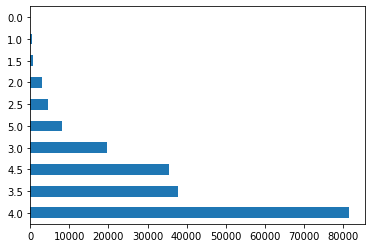

In [74]:
ax = data['review_appearance'].value_counts().plot(kind = 'barh')

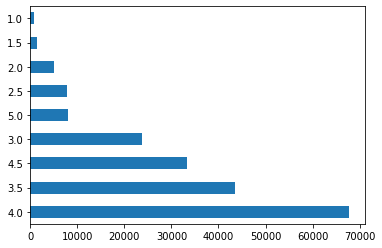

In [75]:
ax = data['review_aroma'].value_counts().plot(kind = 'barh')

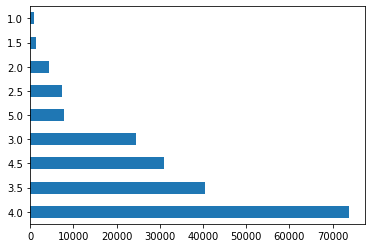

In [76]:
ax = data['review_palate'].value_counts().plot(kind = 'barh')

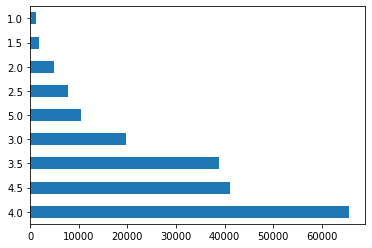

In [77]:
ax = data['review_taste'].value_counts().plot(kind = 'barh')